In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import preprocessing

# Regresion con Maquinas de Soporte Vectorial

In [3]:
# apertura de archivo
ruta = "c:\\Users\\jrgui\\Documents\\GitHub\\Machine_Learning\\Regresion\\datasets\\Position_Salaries.csv"

dataset = pd.read_csv(ruta)
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
#se asignan las variable dependiente e independiente
X = dataset.iloc[:, 1:2].values.reshape(-1,1) # Matriz de caracteristicas, debe ser una matriz
y = dataset.iloc[:,2].values.reshape(-1,1) 

In [5]:
# Escalado de Variables - Estandarizacion y Normalizacion

sc_X = preprocessing.StandardScaler()
X = sc_X.fit_transform(X)
sc_y = preprocessing.StandardScaler()
y = sc_y.fit_transform(y)

print("X",X,"\n", "y",y )

X [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 
 y [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [6]:
#Ajustar la regresion con una maquina de soporte vectorial-kernel Gaussiano

#Para este modelo de deben estandarizar los datos a utilizar
regresion = SVR(kernel="rbf")
regresion.fit(X,y)

c:\Users\jrgui\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

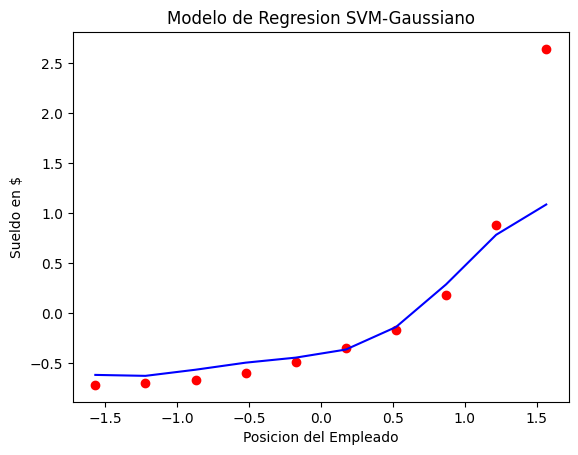

In [7]:
#visualizacion de los datos del modelo SVM kernel gaussiano
plt.scatter(X,y, color="red")
plt.plot(X, regresion.predict(X), color="blue")

plt.title("Modelo de Regresion SVM-Gaussiano")
plt.ylabel("Sueldo en $")
plt.xlabel("Posicion del Empleado")
plt.show()

#No es una aproximacion buena, pero mejor que el kernel polinomial

In [8]:
#Prediccion del modelo, para escala salarial de 6.5
arreglo = np.array([[6.5]])
y_pre = regresion.predict(sc_X.transform(arreglo))
y_pre = sc_y.inverse_transform(y_pre.reshape(-1,1))
y_pre

array([[170370.0204065]])

In [9]:
#Ajustar la regresion con una maquina de soporte vectorial-kernel Gaussiano

#Para este modelo de deben estandarizar los datos a utilizar
regresion = SVR(kernel="poly")
regresion.fit(X,y)

c:\Users\jrgui\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

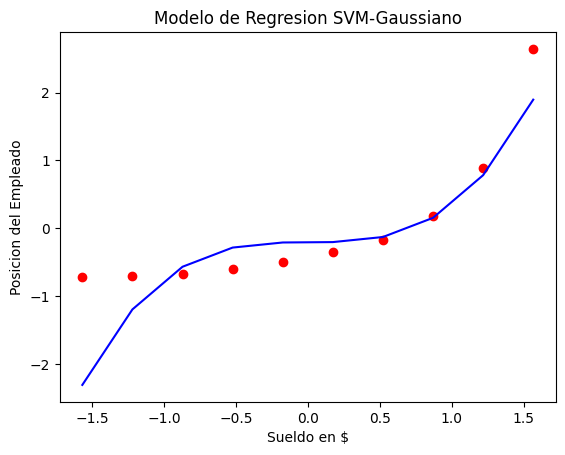

In [10]:
#visualizacion de los datos del modelo SVM kernel gaussiano
plt.scatter(X,y, color="red")
plt.plot(X, regresion.predict(X), color="blue")

plt.title("Modelo de Regresion SVM-Gaussiano")
plt.xlabel("Sueldo en $")
plt.ylabel("Posicion del Empleado")
plt.show()

#Es mejor la aproximacion con el kernel Gaussiano